# Immune Cell Atlas

In [1]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")

from io import StringIO  # got moved to io in python3.
import requests
from glob import iglob
from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


/nfs/leia/research/saraht/chichau/bin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
ad = sc.read("processed/ica_all_reg.h5")

In [3]:
ad.obs['tissue'] = ad.obs['tissue'].str[1:]
ad.uns['tissue_colors'] = ['#FF2F7E','#0f80f5','#939598']

... storing 'tissue' as categorical


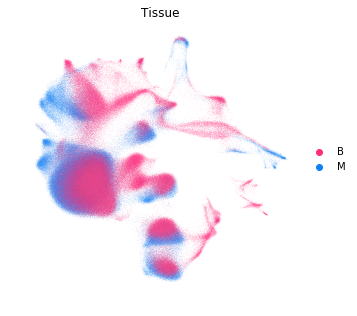

In [4]:
figsize(5,5)
sc.pl.umap(ad,color=['tissue'], title ='Tissue',frameon=False)

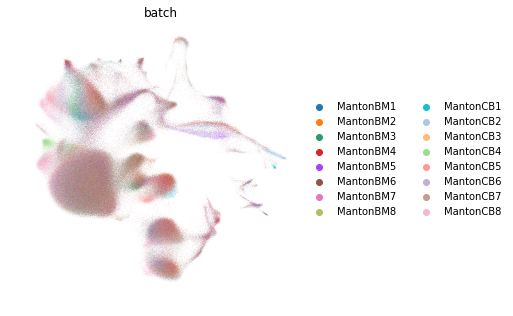

In [5]:
figsize(5,5)
sc.pl.umap(ad,color=['batch'],frameon=False)

In [6]:
sc.tl.louvain(ad, resolution=1.5, key_added='louvain_r1.5')
sc.tl.louvain(ad, resolution=0.5, key_added='louvain_r0.5')
sc.tl.louvain(ad, resolution=0.2, key_added='louvain_r0.2')

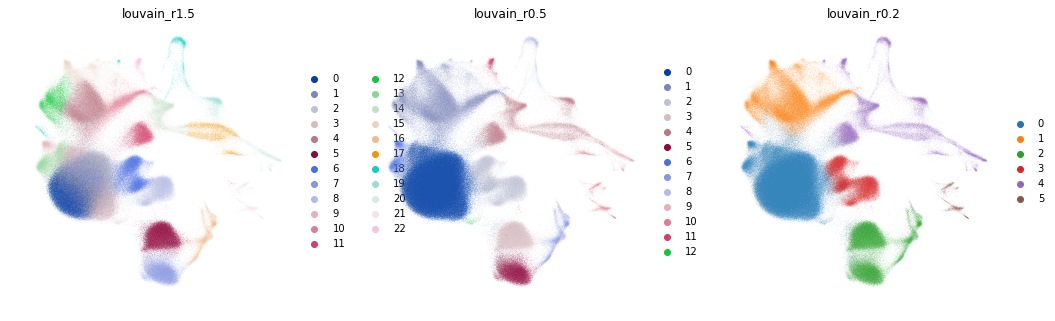

In [7]:
figsize(5,5)
sc.pl.umap(ad,color=['louvain_r1.5','louvain_r0.5','louvain_r0.2'],frameon=False)

In [8]:
ad.obs['L1_Round0'] = ad.obs['louvain_r1.5']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.8504
Accuracy on the training set: 0.9222
Accuracy on the hold-out set: 0.7708


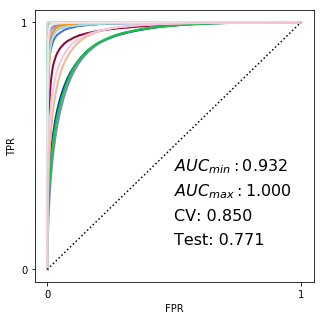

... storing 'L1_Round0_self-projection' as categorical


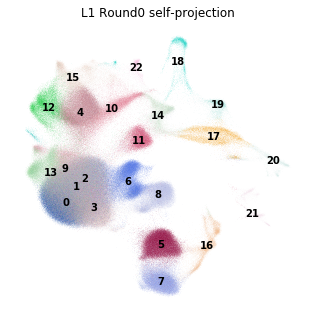

Accuracy on the training set: 0.9109
Accuracy on the hold-out set: 0.7661
Accuracy on the training set: 0.9170
Accuracy on the hold-out set: 0.7699
Max R1mat: 0.221828
Max R2mat: 0.024234
min_acc: 0.766127


<Figure size 360x360 with 0 Axes>

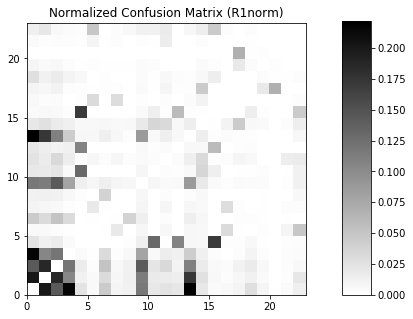

<Figure size 360x360 with 0 Axes>

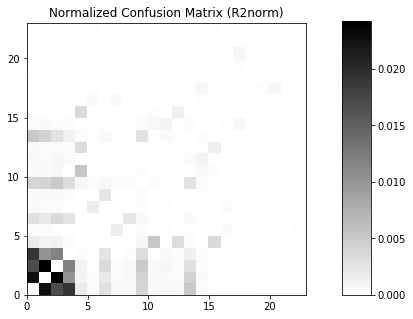

IGRAPH U-W- 23 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.221828
m2: 0.024234
Accuracy: 0.766127
start_iter: 0
R1norm_cutoff: 0.211828
R2norm_cutoff: 0.023234
Accuracy: 0.766127
Round1 ...
Mean CV accuracy: 0.8439
Accuracy on the training set: 0.9126
Accuracy on the hold-out set: 0.7711


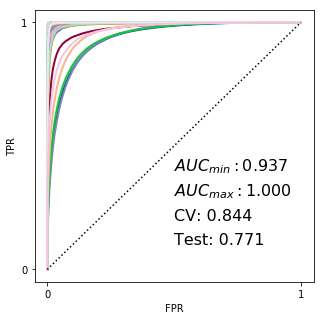

... storing 'L1_Round0_self-projection' as categorical


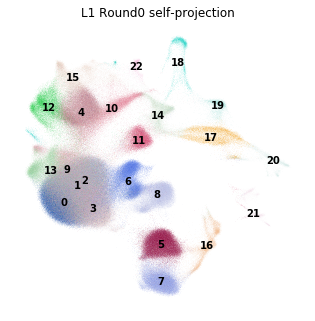

Accuracy on the training set: 0.9157
Accuracy on the hold-out set: 0.7718
Accuracy on the training set: 0.9170
Accuracy on the hold-out set: 0.7723
Max R1mat: 0.210056
Max R2mat: 0.021332
min_acc: 0.771054


<Figure size 360x360 with 0 Axes>

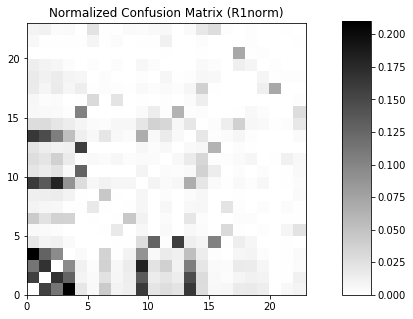

<Figure size 360x360 with 0 Axes>

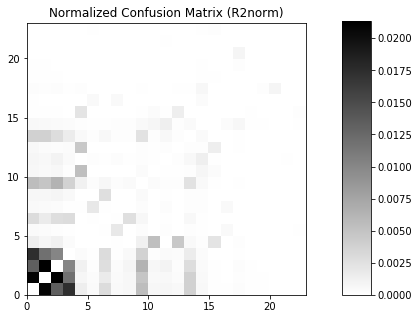

IGRAPH U-W- 23 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.210056
m2: 0.021332
Accuracy: 0.771054
start_iter: 0
R1norm_cutoff: 0.200056
R2norm_cutoff: 0.020332
Accuracy: 0.771054
Round1 ...
Mean CV accuracy: 0.8430
Accuracy on the training set: 0.9217
Accuracy on the hold-out set: 0.7733


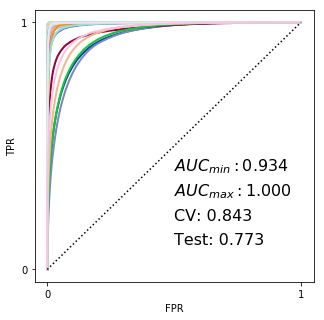

... storing 'L1_Round0_self-projection' as categorical


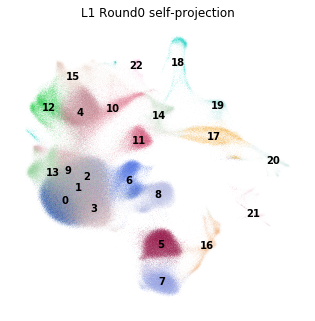

Accuracy on the training set: 0.9161
Accuracy on the hold-out set: 0.7669
Accuracy on the training set: 0.9257
Accuracy on the hold-out set: 0.7784
Max R1mat: 0.224896
Max R2mat: 0.020544
min_acc: 0.766861


<Figure size 360x360 with 0 Axes>

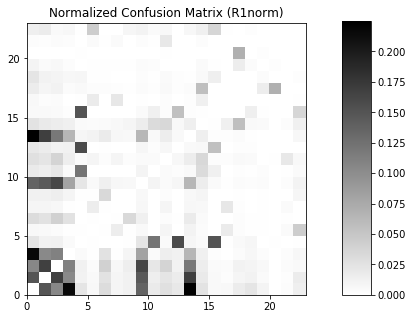

<Figure size 360x360 with 0 Axes>

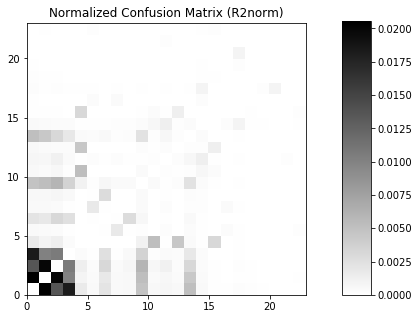

IGRAPH U-W- 23 4 --
+ attr: weight (e)
+ edges:
0--3 0--13 0--3 0--13


... storing 'L1_Round1' as categorical


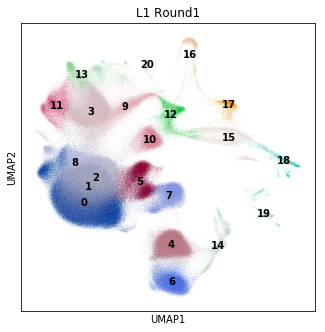

Round2 ...
Mean CV accuracy: 0.8795
Accuracy on the training set: 0.9381
Accuracy on the hold-out set: 0.7749


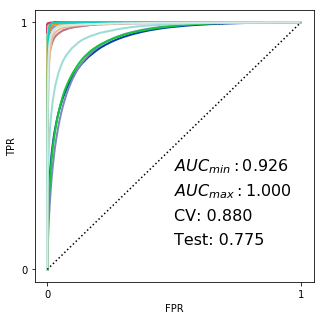

... storing 'L1_Round1_self-projection' as categorical


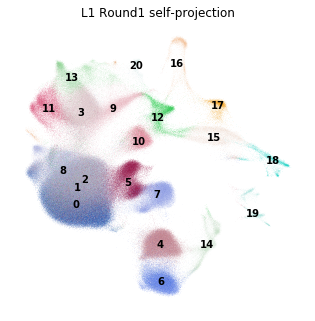

Accuracy on the training set: 0.9376
Accuracy on the hold-out set: 0.7669
Accuracy on the training set: 0.9262
Accuracy on the hold-out set: 0.7757
Max R1mat: 0.556471
Max R2mat: 0.047516
min_acc: 0.766899


<Figure size 360x360 with 0 Axes>

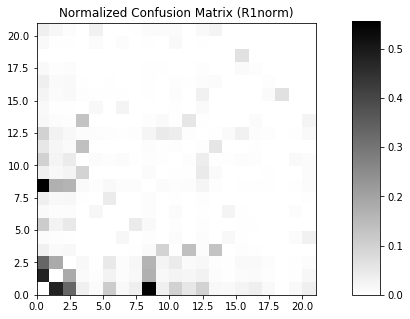

<Figure size 360x360 with 0 Axes>

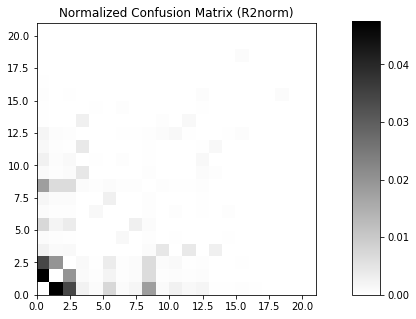

IGRAPH U-W- 21 6 --
+ attr: weight (e)
+ edges:
0--1 0--2 0--8 0--1 0--2 0--8


... storing 'L1_Round2' as categorical


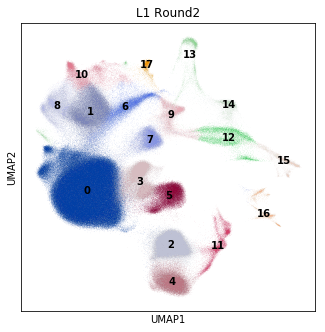

Round3 ...
Mean CV accuracy: 0.9083
Accuracy on the training set: 0.9644
Accuracy on the hold-out set: 0.9090


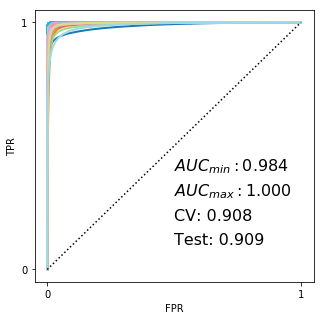

... storing 'L1_Round2_self-projection' as categorical


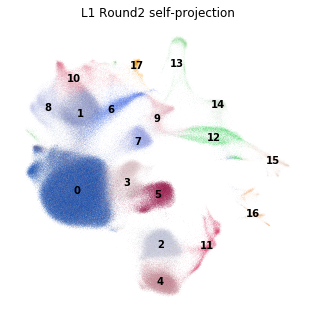

Accuracy on the training set: 0.9617
Accuracy on the hold-out set: 0.9046
Accuracy on the training set: 0.9594
Accuracy on the hold-out set: 0.9048
Max R1mat: 0.272264
Max R2mat: 0.016742
Converge SCCAF_optimize min_acc!
m1: 0.272264
m2: 0.016742
Accuracy: 0.904618


In [9]:
SCCAF_optimize_all(min_acc=0.90, ad=ad, use='pca', basis='umap',low_res = 'louvain_r0.2')

In [24]:
ad.write("processed/ica_all_reg.h5")

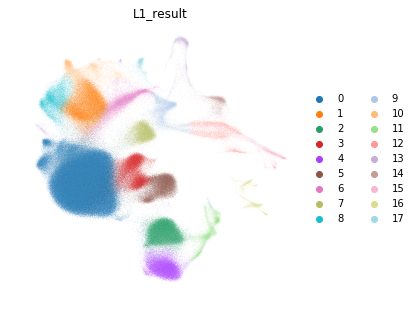

In [12]:
sc.pl.umap(ad,color=['L1_result'], frameon=False)

Mean CV accuracy: 0.9144
Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.8953


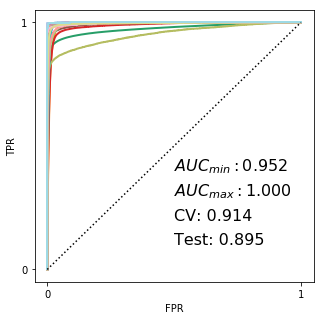

In [20]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.X, ad.obs['L1_result'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

In [21]:
topmarkers = get_topmarkers(clf=clf, names=ad.var_names, topn=30)

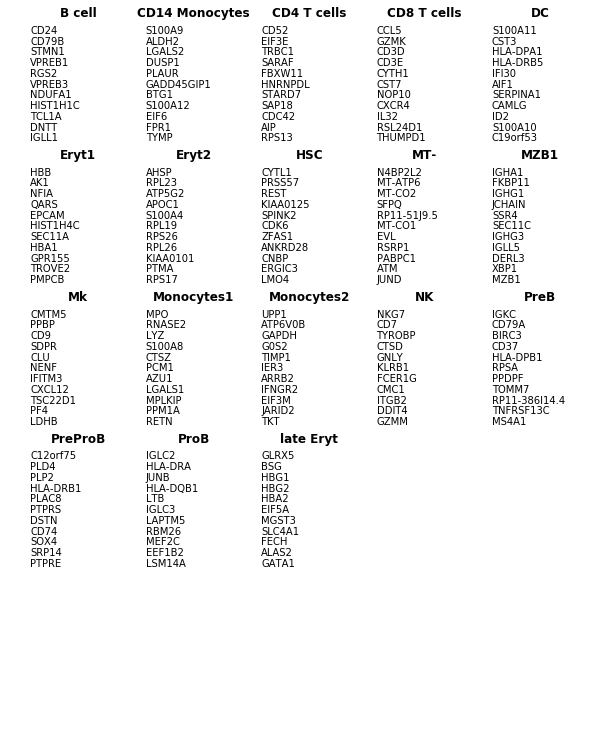

In [28]:
figsize(10,10)
plot_markers(top_markers=topmarkers)

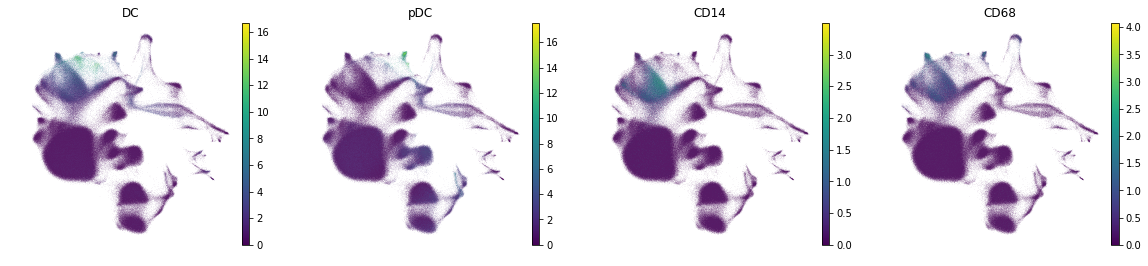

In [38]:
figsize(4,4)
sc.pl.umap(ad,color=['DC','pDC','CD14','CD68'], frameon=False)

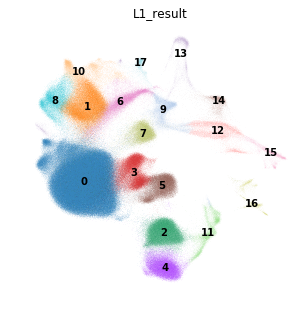

In [14]:
sc.pl.umap(ad,color=['L1_result'], frameon=False,legend_loc='on data')

In [15]:
x = '''CD4 T cells
CD14 Monocytes
PreB
CD8 T cells
ProB
NK
Monocytes1
MT-
Monocytes2
HSC
DC
B cell
Eryt1
Mk
Eryt2
late Eryt
MZB1
PreProB'''

In [16]:
ad.obs['cell'] = ad.obs['L1_result']
ad.obs['cell'].cat.categories =make_unique(x.split('\n'))
ad.obs['cell'] = ad.obs['cell'].str.split('_').str[0]
ad.uns['cell_colors'] = default_20

... storing 'cell' as categorical


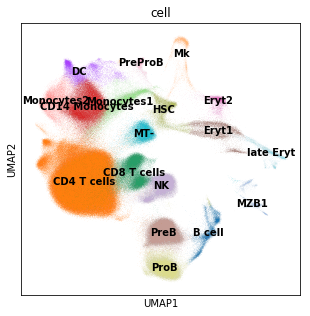

In [17]:
figsize(5,5)
sc.pl.umap(ad,color=['cell'], legend_loc='on data')

In [43]:
ad.write("processed/ica_all_reg.h5")

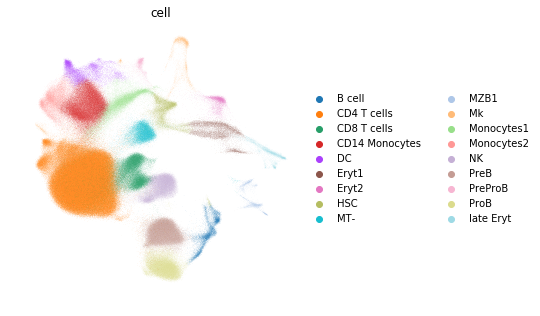

In [13]:
sc.pl.umap(ad,color=['cell'], frameon=False)

Mean CV accuracy: 0.9217
Accuracy on the training set: 0.9628
Accuracy on the hold-out set: 0.9065


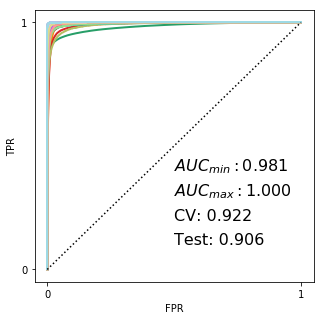

In [19]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.obsm['X_pca'], ad.obs['cell'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()